In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys; sys.path.append('..')
import fastai_scans
from fastai.basics import *

path = Path('../../../datasets/brats2018/')

In [4]:
bs = 4
vol_size = (128,128,128)
patch_size = (64,64,64)

In [5]:
data = (fastai_scans.SegmentationItemList.from_paths(path/'train_data_preprocessed', path/'train_lbls_preprocessed')
                                         .random_split_by_pct(0.2, seed=7)
                                         .label_from_bcolz()
                                         .transform(fastai_scans.get_transforms(do_crop=True),
                                                    size=patch_size, tfm_y=True)
                                         .databunch(bs=bs)
                                         .normalize())

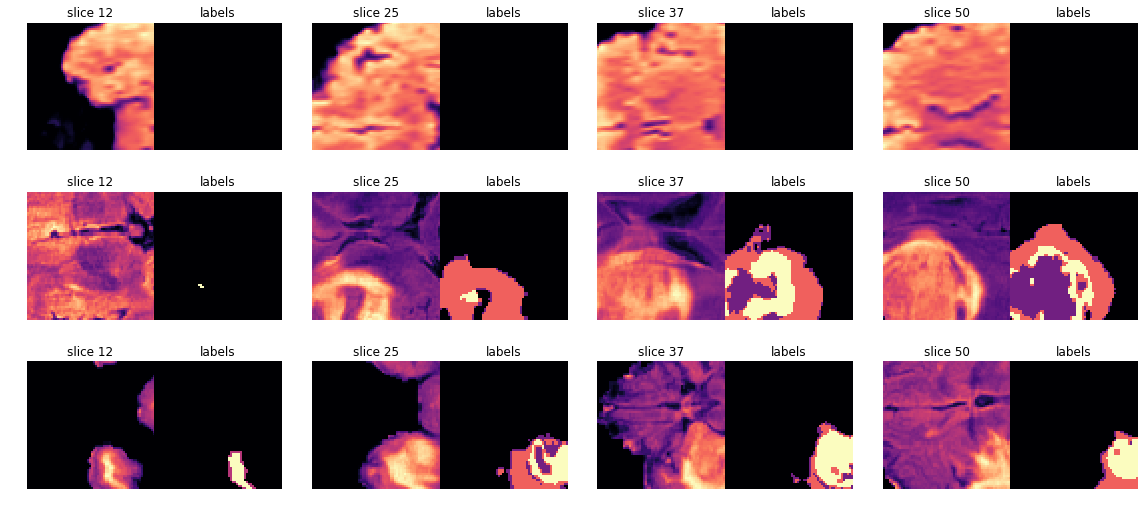

In [7]:
data.show_batch(3)